### Jasmine Dumas (1523905)
### CSC 478: Programming Machine Learning Applications - Autumn 2016
### [Assignment #1](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/assign1.html)
### Due: Thursday, September 29, 2016

For this assignment you will experiment with Python. NumPy, and Pandas in order to perform some basic data preprocessing and analysis tasks.

You will work with a modified subset of a real data set of customer for a bank. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document. You must only use Python, NumPy, Pandas, Matplotlib to perform the tasks for this assignment

In [133]:
## load libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
## read in the data [downloaded from: http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv]
bank_data = pd.read_csv("bank_data.csv")
bank_data = bank_data.drop('id', 1) # drop this!!
bank_data.head(n=5)

age   income  children  gender      region married  car savings_acct  \
0   48  17546.0         1  FEMALE  INNER_CITY      NO   NO           NO   
1   40  30085.1         3    MALE        TOWN     YES  YES           NO   
2   51  16575.4         0  FEMALE  INNER_CITY     YES  YES          YES   
3   23  20375.4         3  FEMALE        TOWN     YES   NO           NO   
4   57  50576.3         0  FEMALE       RURAL     YES   NO          YES   

  current_acct mortgage  pep  
0           NO       NO  YES  
1          YES      YES   NO  
2          YES       NO   NO  
3          YES       NO   NO  
4           NO       NO   NO

In [135]:
bank_data.shape  # 600 rows, 12 columns

(600, 11)

#### 1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [136]:
bank_data.describe() # include="all"

age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000

The table above provides descriptive statistical summaries for the numeric data (age, income, children) including values that can represent the whole features such as mean and median. The quartiles, 25%, 50%, 75% can be used to describe the dispersion or variablity. This 'exploratory' step should occur before performing any deeper analysis to gain insight about the data characteristics.

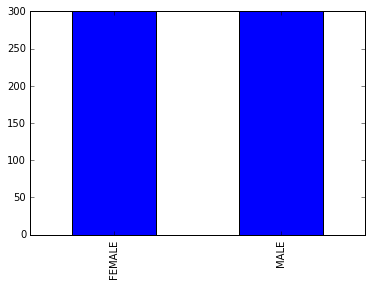

In [137]:
bank_cats = ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep']

bank_data['gender'].value_counts().plot(kind='bar')

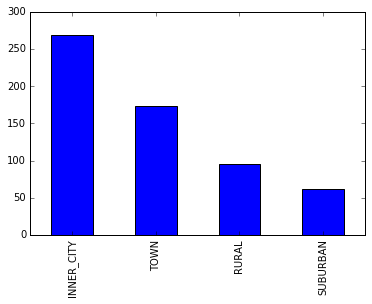

In [138]:
bank_data['region'].value_counts().plot(kind='bar')

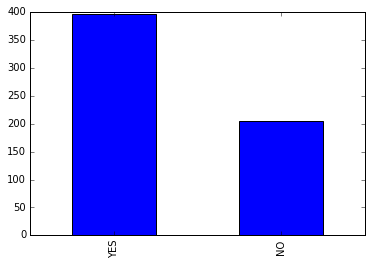

In [139]:
bank_data['married'].value_counts().plot(kind='bar')

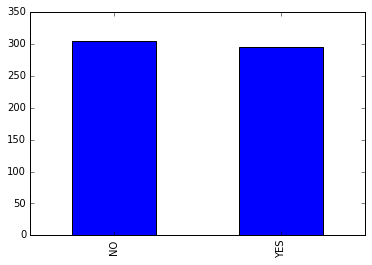

In [140]:
bank_data['car'].value_counts().plot(kind='bar')

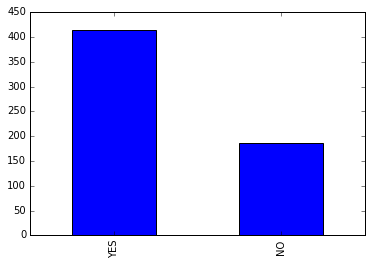

In [141]:
bank_data['savings_acct'].value_counts().plot(kind='bar')

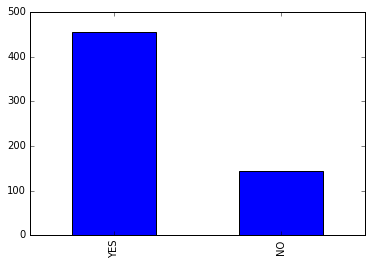

In [142]:
bank_data['current_acct'].value_counts().plot(kind='bar')

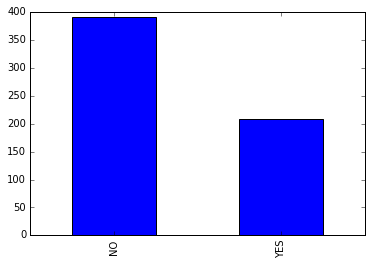

In [143]:
bank_data['mortgage'].value_counts().plot(kind='bar')

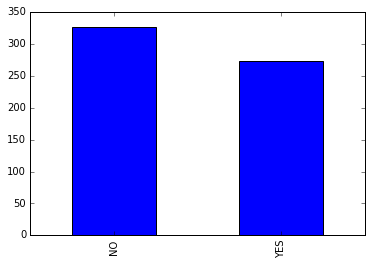

In [144]:
bank_data['pep'].value_counts().plot(kind='bar')

The bar plots above show the distribution of the categorical variables by there unique levels. Understanding the underlying distribution can help lead to selecting appropriate data pre-processing techniques.

#### 2. Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [145]:
# get a statistical summary by pep respones
bank_data.groupby('pep').describe(include='all')

age  car    children current_acct  gender        income  \
pep                                                                          
NO  count   326.000000  326  326.000000          326     326    326.000000   
    unique         NaN    2         NaN            2       2           NaN   
    top            NaN   NO         NaN          YES  FEMALE           NaN   
    freq           NaN  168         NaN          244     170           NaN   
    mean     40.098160  NaN    1.067485          NaN     NaN  24900.953374   
    std      14.123506  NaN    1.195524          NaN     NaN  11661.123422   
    min      18.000000  NaN    0.000000          NaN     NaN   5014.210000   
    25%      27.000000  NaN    0.000000          NaN     NaN  15366.475000   
    50%      40.000000  NaN    0.000000          NaN     NaN  23105.000000   
    75%      51.000000  NaN    2.000000          NaN     NaN  31210.900000   
    max      67.000000  NaN    3.000000          NaN     NaN  61554.600000   
YES count   274.000000  274  274.000000          274     274    274.000000   
    unique         NaN    2         NaN            2       2           NaN   
    top            NaN  YES         NaN          YES    MALE           NaN   
    freq           NaN  138         NaN          211     144           NaN   
    mean     45.127737  NaN    0.945255          NaN     NaN  30644.919453   
    std      14.327991  NaN    0.860571          NaN     NaN  13609.613043   
    min      18.000000  NaN    0.000000          NaN     NaN   7756.360000   
    25%      34.000000  NaN    0.000000          NaN     NaN  19639.475000   
    50%      45.000000  NaN    1.000000          NaN     NaN  28080.050000   
    75%      58.000000  NaN    1.000000          NaN     NaN  38458.350000   
    max      67.000000  NaN    3.000000          NaN     NaN  63130.100000   

           married mortgage      region savings_acct  
pep                                                   
NO  count      326      326         326          326  
    unique       2        2           4            2  
    top        YES       NO  INNER_CITY          YES  
    freq       242      209         146          235  
    mean       NaN      NaN         NaN          NaN  
    std        NaN      NaN         NaN          NaN  
    min        NaN      NaN         NaN          NaN  
    25%        NaN      NaN         NaN          NaN  
    50%        NaN      NaN         NaN          NaN  
    75%        NaN      NaN         NaN          NaN  
    max        NaN      NaN         NaN          NaN  
YES count      274      274         274          274  
    unique       2        2           4            2  
    top        YES       NO  INNER_CITY          YES  
    freq       154      182         123          179  
    mean       NaN      NaN         NaN          NaN  
    std        NaN      NaN         NaN          NaN  
    min        NaN      NaN         NaN          NaN  
    25%        NaN      NaN         NaN          NaN  
    50%        NaN      NaN         NaN          NaN  
    75%        NaN      NaN         NaN          NaN  
    max        NaN      NaN         NaN          NaN

After computing a group operation also known as the split-apply-combine method there are some differences in the groups based on the selection of Personal Equity Plan (pep):
+ Those who said 'YES' to pep have a **larger mean age value** than those who said 'NO', or approx. 45 vs. 40 years old.
+ Those who said 'YES' to pep have a **larger mean income value** than those who said 'NO', or approx. $30,644 vs. $24,900. Income can be skewed by industry and experience level, so this difference also seen in the 50% or median value which is not prone to outliers.
+ Those who said 'YES' to pep have a **more children**  than those who said 'NO'. However the **mean** values are reversed.

This observation in the differences in customer attributes probably signifies that the more assests or societal responsibilites (higher paying job, children to support, etc) the *more* they would be interested in protecting those assests by selecting the pep product.

#### 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [146]:
income_z = (bank_data["income"] - bank_data["income"].mean()) / bank_data["income"].std()
income_z.head(n=10)

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
5    0.802015
6   -1.445560
7   -0.199809
8   -0.172079
9   -0.256749
Name: income, dtype: float64

#### 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [147]:
age_bins = pd.qcut(bank_data.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"], retbins=True)
age_bins

(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
 5          old
 6        young
 7          old
 8      mid-age
 9          old
 10         old
 11         old
 12     mid-age
 13         old
 14     mid-age
 15     mid-age
 16     mid-age
 17     mid-age
 18         old
 19       young
 20         old
 21         old
 22         old
 23       young
 24       young
 25         old
 26     mid-age
 27     mid-age
 28     mid-age
 29         old
         ...   
 570    mid-age
 571    mid-age
 572      young
 573    mid-age
 574    mid-age
 575    mid-age
 576      young
 577        old
 578      young
 579    mid-age
 580        old
 581      young
 582    mid-age
 583    mid-age
 584      young
 585      young
 586      young
 587    mid-age
 588        old
 589      young
 590      young
 591    mid-age
 592    mid-age
 593        old
 594        old
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, dtype: categ

#### 5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

In [148]:
bank_data[[1, 2, 3]] # grab the numeric variables
bank_data[[1, 2, 3]].head(n=5)

income  children  gender
0  17546.0         1  FEMALE
1  30085.1         3    MALE
2  16575.4         0  FEMALE
3  20375.4         3  FEMALE
4  50576.3         0  FEMALE

In [149]:
# vectorized operations done on each of the numeric vectors
mins = bank_data[["age", "income", "children"]].min()
maxs = bank_data[["age", "income", "children"]].max()
print(mins)
print(maxs)

age           18.00
income      5014.21
children       0.00
dtype: float64
age            67.0
income      63130.1
children        3.0
dtype: float64


In [153]:
bank_data[["age", "income", "children"]] = (bank_nums - mins) / (maxs-mins)
print(bank_data[[0, 1, 2]].head(n=5))

        age    income  children
0  0.612245  0.215634  0.333333
1  0.448980  0.431395  1.000000
2  0.673469  0.198933  0.000000
3  0.102041  0.264320  1.000000
4  0.795918  0.783987  0.000000


#### 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [151]:
bank_numeric = pd.get_dummies(bank_data)
bank_numeric.head(n=5)

age    income  children  gender_FEMALE  gender_MALE  \
0  0.612245  0.215634  0.333333            1.0          0.0   
1  0.448980  0.431395  1.000000            0.0          1.0   
2  0.673469  0.198933  0.000000            1.0          0.0   
3  0.102041  0.264320  1.000000            1.0          0.0   
4  0.795918  0.783987  0.000000            1.0          0.0   

   region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  married_NO  \
0                1.0           0.0              0.0          0.0         1.0   
1                0.0           0.0              0.0          1.0         0.0   
2                1.0           0.0              0.0          0.0         0.0   
3                0.0           0.0              0.0          1.0         0.0   
4                0.0           1.0              0.0          0.0         0.0   

    ...     car_NO  car_YES  savings_acct_NO  savings_acct_YES  \
0   ...        1.0      0.0              1.0               0.0   
1   ...        0.0      1.0              1.0               0.0   
2   ...        0.0      1.0              0.0               1.0   
3   ...        1.0      0.0              1.0               0.0   
4   ...        1.0      0.0              0.0               1.0   

   current_acct_NO  current_acct_YES  mortgage_NO  mortgage_YES  pep_NO  \
0              1.0               0.0          1.0           0.0     0.0   
1              0.0               1.0          0.0           1.0     1.0   
2              0.0               1.0          1.0           0.0     1.0   
3              0.0               1.0          1.0           0.0     1.0   
4              1.0               0.0          1.0           0.0     1.0   

   pep_YES  
0      1.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 21 columns]

In [154]:
# save csv file
bank_numeric.to_csv('bank_numeric.csv')

#### 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy].

In [155]:
bank_numeric.corr()

age    income  children  gender_FEMALE  gender_MALE  \
age                1.000000  0.752726  0.023572       0.090081    -0.090081   
income             0.752726  1.000000  0.036761       0.023845    -0.023845   
children           0.023572  0.036761  1.000000       0.014206    -0.014206   
gender_FEMALE      0.090081  0.023845  0.014206       1.000000    -1.000000   
gender_MALE       -0.090081 -0.023845 -0.014206      -1.000000     1.000000   
region_INNER_CITY -0.025171 -0.047564 -0.051222      -0.023459     0.023459   
region_RURAL       0.018635  0.084776  0.089902      -0.009092     0.009092   
region_SUBURBAN    0.031345  0.029824 -0.014122      -0.010951     0.010951   
region_TOWN       -0.008510 -0.036431 -0.007033       0.040472    -0.040472   
married_NO        -0.010394  0.008386  0.048716       0.021110    -0.021110   
married_YES        0.010394 -0.008386 -0.048716      -0.021110     0.021110   
car_NO            -0.077733 -0.081556 -0.036455       0.006667    -0.006667   
car_YES            0.077733  0.081556  0.036455      -0.006667     0.006667   
savings_acct_NO   -0.184389 -0.266164 -0.041536       0.007207    -0.007207   
savings_acct_YES   0.184389  0.266164  0.041536      -0.007207     0.007207   
current_acct_NO    0.035312 -0.031616 -0.006238      -0.019466     0.019466   
current_acct_YES  -0.035312  0.031616  0.006238       0.019466    -0.019466   
mortgage_NO        0.016154  0.014662  0.074339       0.066465    -0.066465   
mortgage_YES      -0.016154 -0.014662 -0.074339      -0.066465     0.066465   
pep_NO            -0.173825 -0.221991  0.057663       0.046843    -0.046843   
pep_YES            0.173825  0.221991 -0.057663      -0.046843     0.046843   

                   region_INNER_CITY  region_RURAL  region_SUBURBAN  \
age                        -0.025171      0.018635         0.031345   
income                     -0.047564      0.084776         0.029824   
children                   -0.051222      0.089902        -0.014122   
gender_FEMALE              -0.023459     -0.009092        -0.010951   
gender_MALE                 0.023459      0.009092         0.010951   
region_INNER_CITY           1.000000     -0.393444        -0.306032   
region_RURAL               -0.393444      1.000000        -0.148158   
region_SUBURBAN            -0.306032     -0.148158         1.000000   
region_TOWN                -0.573814     -0.277798        -0.216080   
married_NO                 -0.003254      0.022649        -0.012483   
married_YES                 0.003254     -0.022649         0.012483   
car_NO                      0.018143     -0.024006         0.061184   
car_YES                    -0.018143      0.024006        -0.061184   
savings_acct_NO             0.091373     -0.036960        -0.002605   
savings_acct_YES           -0.091373      0.036960         0.002605   
current_acct_NO            -0.007894      0.008496        -0.038157   
current_acct_YES            0.007894     -0.008496         0.038157   
mortgage_NO                -0.002098      0.051908        -0.004635   
mortgage_YES                0.002098     -0.051908         0.004635   
pep_NO                     -0.001054     -0.019714        -0.062508   
pep_YES                     0.001054      0.019714         0.062508   

                   region_TOWN  married_NO    ...       car_NO   car_YES  \
age                  -0.008510   -0.010394    ...    -0.077733  0.077733   
income               -0.036431    0.008386    ...    -0.081556  0.081556   
children             -0.007033    0.048716    ...    -0.036455  0.036455   
gender_FEMALE         0.040472    0.021110    ...     0.006667 -0.006667   
gender_MALE          -0.040472   -0.021110    ...    -0.006667  0.006667   
region_INNER_CITY    -0.573814   -0.003254    ...     0.018143 -0.018143   
region_RURAL         -0.277798    0.022649    ...    -0.024006  0.024006   
region_SUBURBAN      -0.216080   -0.012483    ...     0.061184 -0.061184   
region_TOWN           1.000000   -0.00

The correlation matrix above is used to understand the relationship and inter-dependence of each variable, thus highlighting high or low correlated variables. Correlation analysis is important for data pre-processing and algorithm selection as some methods do not perform well with variables that are have multicollinearity. The Pearson correlation coefficient which measures the linear dependence between two variables. The closer the value is to +1 or -1 the more the variables share a relationship together.

*Some significant positive correlation noticed above is:*

+ age ~ income [0.752726]

*Some significant negative correlation noticed above is:*

+ region_INNER_CITY ~ region_RURAL [-0.393444]


#### 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

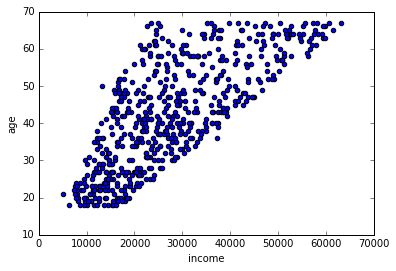

In [156]:
# read in the original file again to get the non-normalized data again
bank_data2 = pd.read_csv("bank_data.csv")
bank_data2.plot(x="income", y="age", kind="scatter")

According to the scatterplot above the variables **do** seem correlated as the data points are closely touching and appear to be going in straight-line pattern.

#### 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

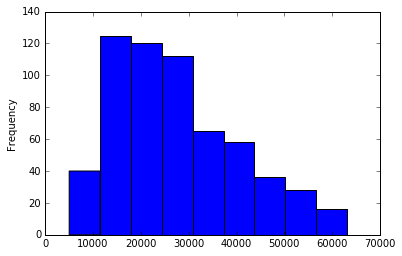

In [157]:
bank_data2["income"].plot(kind="hist", bins=9)

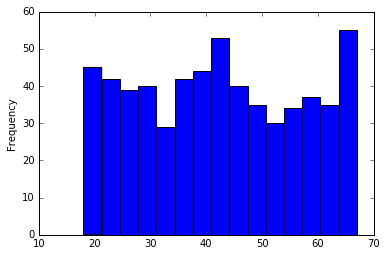

In [158]:
bank_data2["age"].plot(kind="hist", bins=15)

#### 10. Using a bargraph, plot the distribution of the values of the region attribute.

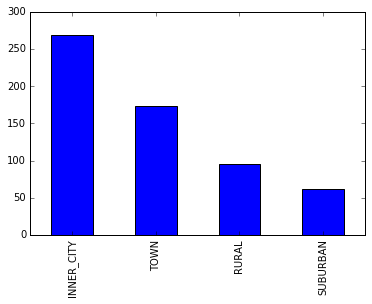

In [167]:
bank_data2['region'].value_counts().plot(kind='bar')

#### 11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [165]:
pr = pd.crosstab(bank_data2.region, bank_data2.pep) # region as rows, pep as columns
print(pr)

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71


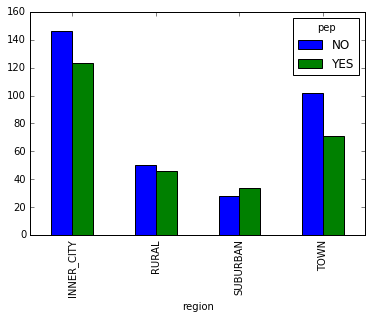

In [166]:
pr.plot(kind="bar")

____
fin.